In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the placement csv dataset
df_placement = pd.read_csv('placement.csv')
df_placement.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df_placement.shape

(1000, 3)

In [4]:
df_placement.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# <b>1.Outlier detection using Z-Score method</b>

<b>To detect and apply z-score method, we need to check whether data is normally distrbuted or not, if normally distributed, we can aaply z-score method</b>

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

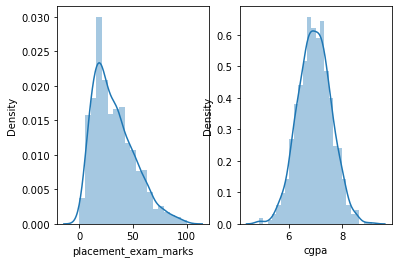

In [5]:
plt.subplot(1,2,1)
sns.distplot(df_placement['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(df_placement['cgpa'])

<b>From above graph we can clearly see that cgpa is normally distributed, so we can apply Z-Score method here</b>

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


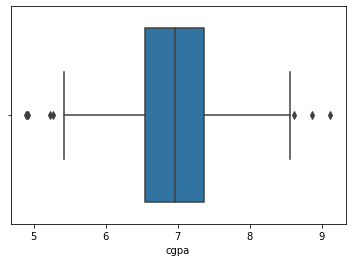

In [6]:
#Let's check for outliers using boxplot
sns.boxplot(df_placement['cgpa'])
plt.show()

<b>So clearly we have some datapoints which we can termed as outliers as they are values which are more than our maximum value, so let us remove them</b>

In [7]:
upper_limit = df_placement['cgpa'].mean()+3*(df_placement['cgpa'].std())
lower_limit = df_placement['cgpa'].mean()-3*(df_placement['cgpa'].std())

In [8]:
print(upper_limit)
print(lower_limit)

8.808933625397177
5.113546374602842


<b>We can remove outliers by two methods</b>

<b>1.Trimming - Removing the outliers from dataset</b>

<b>2.Capping - Filling the outliers with upper or lower limit</b>

<b>1.Trimming</b>

In [9]:
#1.Trimming
df_placement[(df_placement['cgpa']>upper_limit) | (df_placement['cgpa']<lower_limit)].shape

(5, 3)

In [10]:
#So there are 321 rows with outliers, let's remove them
new_df_placement = df_placement[(df_placement['cgpa']<=upper_limit) & (df_placement['cgpa']>=lower_limit)]

In [11]:
new_df_placement.shape

(995, 3)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

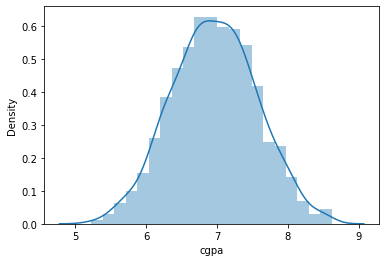

In [12]:
sns.distplot(new_df_placement['cgpa'])

<b>From above graph so we can clearly see that now outliers are removed from our dataset</b>

In [13]:
new_df_placement.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


<b>2.Capping</b>

In [14]:
#For capping we have to fill the outlier values using upper or lower limit based on the requirements
df_placement['cgpa'] = np.where(df_placement['cgpa']>=upper_limit,upper_limit,
         np.where(df_placement['cgpa']<=lower_limit,lower_limit,df_placement['cgpa']))

In [15]:
df_placement.shape

(1000, 3)

In [16]:
df_placement.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

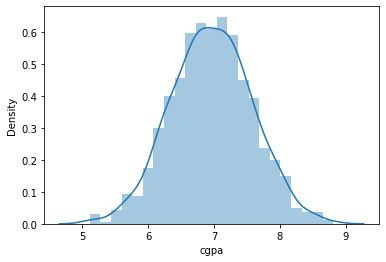

In [17]:
sns.distplot(df_placement['cgpa'])

In [19]:
#We can also create the Z-Score column in our dataset
df_placement['Z-Score'] = (df_placement['cgpa']-df_placement['cgpa'].mean())/df_placement['cgpa'].std()
df_placement.head()

,cgpa,placement_exam_marks,placed,Z-Score
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235


# <b>2.Outlier detection using IQR method</b>

<b>As we can see that placement_exam_marks column is skewed(not normally distributed), so we can use IQR method</b>

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

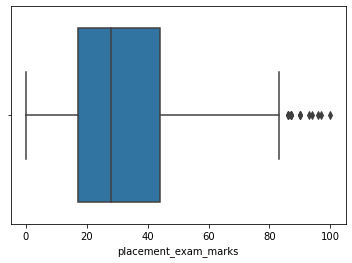

In [27]:
sns.boxplot(df_placement['placement_exam_marks'])

In [24]:
Q3 = df_placement['placement_exam_marks'].quantile(0.75)
Q1 = df_placement['placement_exam_marks'].quantile(0.25)

In [25]:
print(Q3)
print(Q1)

44.0
17.0


In [26]:
IQR = Q3 - Q1
IQR

27.0

In [28]:
upper_limits = Q3 + 1.5*IQR
lower_limits = Q1 - 1.5*IQR

In [29]:
print(upper_limits)
print(lower_limits)

84.5
-23.5


<b>1.Handling outliers using Trimming</b>

In [32]:
new_df_placement_trimmed = df_placement[(df_placement['placement_exam_marks']<=upper_limits) & (df_placement['placement_exam_marks']>=lower_limits)]

In [34]:
new_df_placement_trimmed.head()

,cgpa,placement_exam_marks,placed,Z-Score
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235


In [35]:
new_df_placement_trimmed.shape

(985, 4)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

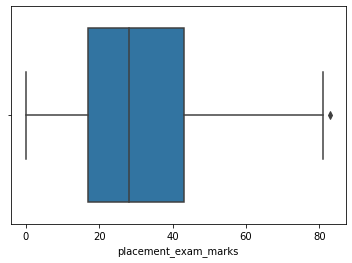

In [36]:
sns.boxplot(new_df_placement_trimmed['placement_exam_marks'])

<b>We can see almost all the outliers are removed from the dataset</b>

<b>2.Handling outliers using Capping</b>

In [40]:
df_placement['placement_exam_marks'] = np.where(df_placement['placement_exam_marks']>upper_limits,upper_limits,
                                               np.where(df_placement['placement_exam_marks']<lower_limits,lower_limits,
                                                        df_placement['placement_exam_marks']))

df_placement.shape

(1000, 4)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

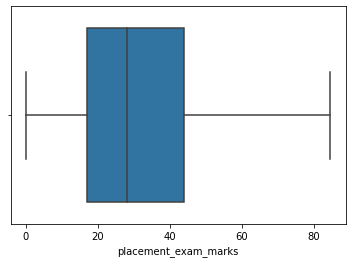

In [41]:
sns.boxplot(df_placement['placement_exam_marks'])

# <b>3.Outlier detection using Percentile method</b>

<b>For this we will bee using different dataset</b>

In [42]:
df = pd.read_csv('weight-height.csv')

In [43]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [44]:
df.shape

(10000, 3)

In [45]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<b>Here, we will work with height column for outlier detection and removal</b>

In [46]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

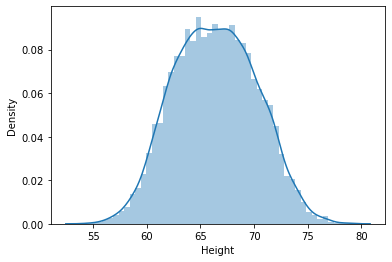

In [47]:
sns.distplot(df['Height'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

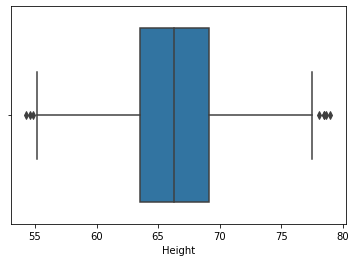

In [48]:
sns.boxplot(df['Height'])

<b>So we can clearly see that Height column has some outliers and is almost normally distributed, so here we will apply Percentile method for a scope of learning</b>

<b>In Percentile method, we consider upper limit value and lower limit value</b>

<b>1.Upper limit value means, the values above upper limit will be consider as an outlier</b>

<b>2.Lower limit value means, the values below lower limit will be consider as an outlier</b>

<b>Here we will consider upper limit as 99 percentile and lower limit as 1 percentile</b>

In [51]:
percentile_99 = df['Height'].quantile(0.99)
percentile_1 = df['Height'].quantile(0.01)

In [52]:
print(percentile_99)
print(percentile_1)

74.7857900583366
58.13441158671655


<b>1.Handling outliers using Trimming</b>

In [54]:
df[(df['Height']>=percentile_99) | (df['Height']<=percentile_1)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [57]:
new_df = df[(df['Height']<=percentile_99) & (df['Height']>=percentile_1)]

In [58]:
new_df.shape

(9800, 3)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

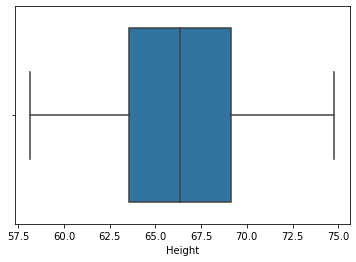

In [59]:
sns.boxplot(new_df['Height'])

<b>We can see all the outliers are removed from the dataset</b>

<b>2.Handling outliers using Capping(Winsorization)</b>

In [60]:
df['Height'] = np.where(df['Height']>percentile_99,percentile_99,np.where(df['Height']<percentile_1,percentile_1,df['Height']))

In [61]:
df.shape

(10000, 3)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

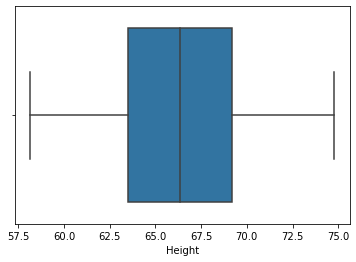

In [62]:
sns.boxplot(df['Height'])

<b>We can see all the outliers are removed from the dataset using capping</b>

# <b>!!!!! Thank You !!!!!</b>